# 1D Heat Diffusion on a Rod

This notebook simulates heat diffusion in 1 dimension on a discrete domain with Dirichlet boundary conditions. This has a physical interpretation as a rod whose ends are soaked in cold water.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from lib.datasets import gaussian_mixture

In [2]:
def square_wave(u, nx):
    for i in range(1,nx-1):
        if(i>(nx-1)/4 and i< (nx-1)/2):
            u[i,0] = 2
        else:
            u[i,0] = 0
    
    #bdry
    u[0,:] = 0
    u[nx-1,:] = 0
    
    return u

def line(u, dx, m, b, N):
    nx = np.int(N/dx + 1)
    for i in range(1,nx-1):
        u[i,0] = m*i*dx + b
    u[0,:] = u[1,0]
    u[nx-1,:] = u[nx-2,0]
    return u

In [3]:
def onediffusion(nt, nx, T, N, k): #nt,nx are number of intervals, T is max time, N is max position, k is diffusivity
    #dt dx
    dt = T/(nt-1)
    dx = N/(nx-1)
    
    #init u, x
    u = np.zeros((nx,nt))
    x = np.zeros(nx)
    
    # bdry
    
    
    # initial conditions 
    #(square wave)
    square_wave(u,nx)
    
    #(mx+b)
    #line(u,dx,1,.1, N)
    
    
            

    # iterating over time and position
    for i in range(0, nt-1):
        for j in range(0,nx-1):
            u[j,i+1] = u[j,i] + k*(dt/(dx**2))*(u[j+1,i] - 2*u[j,i] + u[j-1,i])
            
    #also x
    for i in range(0,nx):
        x[i] = i*dx
    
    return u,x

In [4]:
def plot_diff(u,x, nt):
    plt.figure()
    color = iter(cm.rainbow(np.linspace(0,10,nt)))
    for i in range(0,nt,10):
        c= next(color)
        plt.plot(x,u[:,i], c=c)
    plt.xlabel('x')
    plt.ylabel('u')
    plt.ylim([-1.0,3.0])
    plt.show()

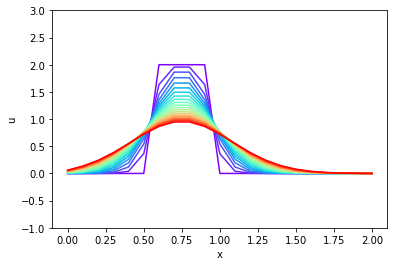

In [29]:
u, x = onediffusion(201,21,.5,2.0,.1)
plot_diff(u,x,201)

In [17]:
ngau = 5
npt = 5
n = ngau * npt
data = gaussian_mixture(ngau, npt, 2)
print(data.shape)

(25, 2)


In [20]:
#grid
w,h = 10, 10
#stepsize
dx,dy = 0.1, 0.1
#second stepsize
dx2, dy2 = dx**2, dy**2
#steps
nx, ny = int(w/dx),int(h/dy)
#constant of diffusivity
D = 2
#timestep wrt stability bound
dt = (dx*dy/(2*D*(dx2 + dy2)))

#so we're gonna diffuse a donut with a hot interior

#temp on the bdry, (mini will be outer, maxi will be interior)
tmin , tmax = 200, 800


#construct donut
v0 = tmin * np.ones((nx,ny))
#copy to diffuse on
u = v0.copy()

#initialize donut (interior is circle of radius r centered at xc yc)
r, xc, yc = 2, 5, 5
for i in range(nx):
    for j in range (ny):
        dc = (i*dx - xc)**2 + (j*dy - yc)**2
        if dc< r**2:
            v0[i][j] = tmax    